

- Authored: David Liebovitz, MD
- Additional code updates and comments contributed by Xinyang(Oliver) Zhou, Northwestern Univ.
- Updated by Jay Manadan
- Northwestern University Feinberg School of Medicine    
- Feel free to use with attribution.  

[Part 1](https://drive.google.com/file/d/1N9U5NybETiu6JdUBoiFvuLiZZ6UuG0Nx/view?usp=sharing), [Part 2](https://drive.google.com/file/d/1JGePTrMJfnjH4WWpu_F77Oy_rLRR2pCW/view?usp=sharing), [Part 3](https://drive.google.com/file/d/1UrGbYapImkuFA4RTp1rYC1zLCaCgaAxQ/view?usp=sharing),
[Part 4](https://drive.google.com/file/d/1h7NnkPIihE_JuztP7uEcEK3T5JMcDHk4/view?usp=sharing), [Part 5](https://drive.google.com/file/d/1qxjFy2fPc72tkyJxupQ6EruvFR94txaf/view?usp=sharing), [Part 6](https://drive.google.com/file/d/1bzYpdEFhFlr1_uqMIwNKesJ7XAWRSB5O/view?usp=sharing)

# **Part 2 - recreated here for running in VSCode instead of Colab**
-  ### This allows you to use your computer's own python - so processing is secure and private!
-  ### Always review your methods and approches with your PI. 
-  ### Go through all steps in the README.md file **first** so the notebook actually works!
## *Exploring and Visualizing Datasets*


Since you already know how these notebooks work, we'll quickly load up a dataset and begin. (If more explanation needed, click [here](https://colab.research.google.com/drive/1WlU9aOqW0lGGD2J5uiBBv13fGsIzUXg3?usp=sharing) to go back to part 1.)


*The cells below will craft some layered graphs. In case any graph fails to display, run the cell again and it should work!*

Our first step is to run the hidden code cell below. You can open it if you want! Don't worry about the details of this code for now, just make sure it runs.








In [17]:
import sys

# Install required dependencies quietly for VSCode
!{sys.executable} -m pip install --quiet pandas numpy matplotlib seaborn plotly ipywidgets "nbformat>=4.2.0" statsmodels
# Be sure to run this critical first cell to import "libaries" and prepare our cloud computer!
import pandas as pd  # Pandas for data manipulation and analysis.
import copy  # Copy module for creating deep copies of objects.
import numpy as np  # NumPy for numerical computations.
# Enables dataframe formatter for data tables.

# Some of the visualizing settings, too
import matplotlib.pyplot as plt  # Matplotlib for basic plotting.
import seaborn as sns  # Seaborn for statistical data visualization.
import plotly  # Plotly for interactive and web-based visualizations.
import plotly.express as px  # Plotly Express for easy and high-level interface to Plotly.
import plotly.io as pio  # Plotly IO for managing rendering options.
import ipywidgets as widgets  # IPython widgets for creating interactive user interfaces.
from ipywidgets import interact  # Interact module for interactive widgets.


# Options set here for setting views at a reasonable size
# pd.options.display.max_columns = 50
# pd.options.display.max_rows = 30
# pio.renderers.default = "colab"
# !pip install ipympl


# Plotly options for color options
palettes = [("Pastel", px.colors.qualitative.Pastel1), # List of color palettes available in Plotly.
            ("Plotly", px.colors.qualitative.Plotly),
            ("Alphabet", px.colors.qualitative.Alphabet),
            ("Dark24", px.colors.qualitative.Dark24),
            ("Vivid", px.colors.qualitative.Vivid),
            ("Safe", px.colors.qualitative.Safe),
            ]



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip



# Data import

For Part 2, we'll stick with the same dataset:

A public deidentified dataset sourced from University of Virginia studies by Dr. Robert Schorling of several hundred rural African American patients. Additional information on this data set is available here:   
> https://hbiostat.org/data/repo/diabetes.html   

We need to get this data from the internet into our notebook. The code below does that. It's essentially tells the computer where to find the data file and then brings it in.

In [2]:
# Run this cell to reference the website that is holding the diabetes data in a CSV (comma separated values) file!
website = "https://drive.google.com/uc?export=download&id=1PQM8eQnQpaJwe9mAVb_XBpZoWoA5nTlM"

# The command below assigns the name dm_raw to the now read CSV file retrieved from the website!
dm_raw = pd.read_csv(website)

# Let's view 10 rows of data and enable sorting for the columns. Click column headers to get a feel for the max/min for columns.
# What's the maximum SBP? Lowest HDL? Note the Filter option at the top right. Click and filter to see how many patients are over 85.

dm_raw.head(10)  # Display the first 10 rows of the dataset.

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,194,86,67,2.9,35,male,66,159,25.7,115,64,31,35,0.89,No diabetes
1,158,74,64,2.5,30,female,62,142,26.0,108,68,32,34,0.94,No diabetes
2,203,71,78,2.6,45,male,66,115,18.6,135,88,30,34,0.88,No diabetes
3,160,82,41,3.9,30,female,63,143,25.3,172,124,33,40,0.83,No diabetes
4,155,81,70,2.2,32,female,65,151,25.1,120,68,33,40,0.83,No diabetes
5,179,77,50,3.6,29,male,68,170,25.8,122,68,38,39,0.97,No diabetes
6,213,83,47,4.5,33,female,65,157,26.1,130,90,37,41,0.90,No diabetes
7,170,76,60,2.8,27,female,63,119,21.1,122,86,28,37,0.76,No diabetes
8,200,56,51,3.9,40,female,62,105,19.2,125,64,26,33,0.79,No diabetes
9,211,98,40,5.3,40,female,68,179,27.2,110,76,37,43,0.86,No diabetes


# Tidy Datasets!!!

For a little reminder context, the data from the CSV file was "read into" a Pandas dataframe. A dataframe is like an Excel worksheet - and capable of more than "x" and "y" dimensions. Think of stacks of worksheets. Here, the dataframe is just one layer: the CSV file we imported.


When we look at our data, we can see it's organized neatly. This is called "tidy data." It means:

- Each column is a type of information (like Age, or Blood Pressure).
- Each row is a single person's information.
- Each box (cell) has just one piece of information.
Having [tidy data](https://www.jstatsoft.org/article/view/v059i10) makes it much easier to work with and analyze!

We want to make sure the computer understands what kind of information is in each column. Is it a number, or text? The code below checks this for us. [Tools exist](https://github.com/pwwang/datar) to convert messy datasets to Tidy Data format, too!

Once your own dataset is tidy, feel free to re-use any code below with tweaks to select the right columns and other parameters.

While Pandas (the routine that "reads" the CSV file) usually interprets the type of data correctly, let's make sure all values are recognized as integers (`int64`) or decimal values (`float64`) and that categories like diabetes are recognized as an `object`:

In [3]:
# The ".dtypes" command will show us the data types for each column of data in our Tidy dataset now stored as a Pandas dataframe:

dm_raw.dtypes.sort_values(ascending=False) # ascending=False is equal to descending

Gender              object
Diabetes            object
Chol/HDL ratio     float64
BMI                float64
Waist/hip ratio    float64
Cholesterol          int64
Glucose              int64
HDL Chol             int64
Age                  int64
Height               int64
Weight               int64
Systolic BP          int64
Diastolic BP         int64
waist                int64
hip                  int64
dtype: object

The data types were recognized perfectly! Numbers are recognized as numbers, and text categories like 'Gender' are recognized as text.

## Quick Look at the Numbers

We can get a summary of the numbers in our Pandas dataframe very quickly. The describe() command does this.

In [4]:
# We'll start just with numerical data first and round to one decimal point, too.

dm_raw.describe().round(1) # Round to only 1 decimal place

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio
count,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0
mean,207.2,107.3,50.3,4.5,46.8,66.0,177.4,28.8,137.1,83.3,37.9,43.0,0.9
std,44.7,53.8,17.3,1.7,16.4,3.9,40.4,6.6,22.9,13.5,5.8,5.7,0.1
min,78.0,48.0,12.0,1.5,19.0,52.0,99.0,15.2,90.0,48.0,26.0,30.0,0.7
25%,179.0,81.0,38.0,3.2,34.0,63.0,150.2,24.1,122.0,75.0,33.0,39.0,0.8
50%,203.0,90.0,46.0,4.2,44.5,66.0,173.0,27.8,136.0,82.0,37.0,42.0,0.9
75%,229.0,107.8,59.0,5.4,60.0,69.0,200.0,32.3,148.0,90.0,41.0,46.0,0.9
max,443.0,385.0,120.0,19.3,92.0,76.0,325.0,55.8,250.0,124.0,56.0,64.0,1.1


Here's what those numbers mean:

> `count`: How many entries there are in that column.   
> `mean`: The average value.   
> `std`: The standard deviation for the values in the column.   
> `25`%: The 25th percentile value.   
> `50`%: The 50th percentile value.   
> `75`%: The 75th percentile value.   
> `min`: The lowest value for the column.   
> `max`: The highest value for the column.   


This summary tells us several interesting things   

> - There are 390 rows (unique patients) and no data is missing. (390 across the board.)    
> - The mean fasting glucose  is 107, although the max is 385.
> - The mean age is 46.8 and the oldest person is 92.
> - The mean BMI is 28.8, max is 55.8 and min is 15.2.

## Quick Look at the Categories

Now let's look at the columns with text, like 'Gender' and 'Diabetes'.

In [5]:
# The 'object' setting retrieves the categorical columns.

dm_raw.describe(include='object')

,Gender,Diabetes
count,390,390
unique,2,2
top,female,No diabetes
freq,228,330


Here's what these terms mean for text columns:
> `unique`: How many different types of values are there (like "Male" and "Female").    
> `top`: The most frequent value present.    
> `freq`: How many times the 'top' value appears.    

So most subjects are women 228/390 and most do NOT have diabetes 330/390.

Cleaning Up Column Names       
   
Sometimes, column names have spaces or special characters that can make things a little tricky. Let's create a clean copy of our data with easier-to-use names.   
Let's leave our "raw" dataframe intact and copy our dataset into a new dataframe, `dm_clean` with cleaned up column headers.

In [6]:
# These commands copy our original data into a new "clean" dataframe!

# 'copy.deepcopy(dm_raw.values)' creates a deep copy of the data values to ensure the original data remains unchanged.
dm_clean = pd.DataFrame(columns = dm_raw.columns, data = copy.deepcopy(dm_raw.values))

# This helps in correcting any misassigned data types, making the DataFrame more suitable for analysis.
dm_clean = dm_clean.infer_objects()

# Now, let's remove all the spaces from column names and replace then with an underscore.
dm_clean.columns = [c.replace(' ', '_') for c in dm_clean.columns]

# Now let's do the same thing for the /'s in any column names.)
dm_clean.columns = [c.replace('/', '_') for c in dm_clean.columns]

# Let's check out the new names:
dm_clean.dtypes.sort_values(ascending=False)

Gender              object
Diabetes            object
Chol_HDL_ratio     float64
BMI                float64
Waist_hip_ratio    float64
Cholesterol          int64
Glucose              int64
HDL_Chol             int64
Age                  int64
Height               int64
Weight               int64
Systolic_BP          int64
Diastolic_BP         int64
waist                int64
hip                  int64
dtype: object

Now our column names are nice and clean!   
   
Making Pictures: Histograms       
   
Pictures can help us visualize our data! Let's start with a histogram. A histogram is a bar chart that shows us how often different values appear in a column.

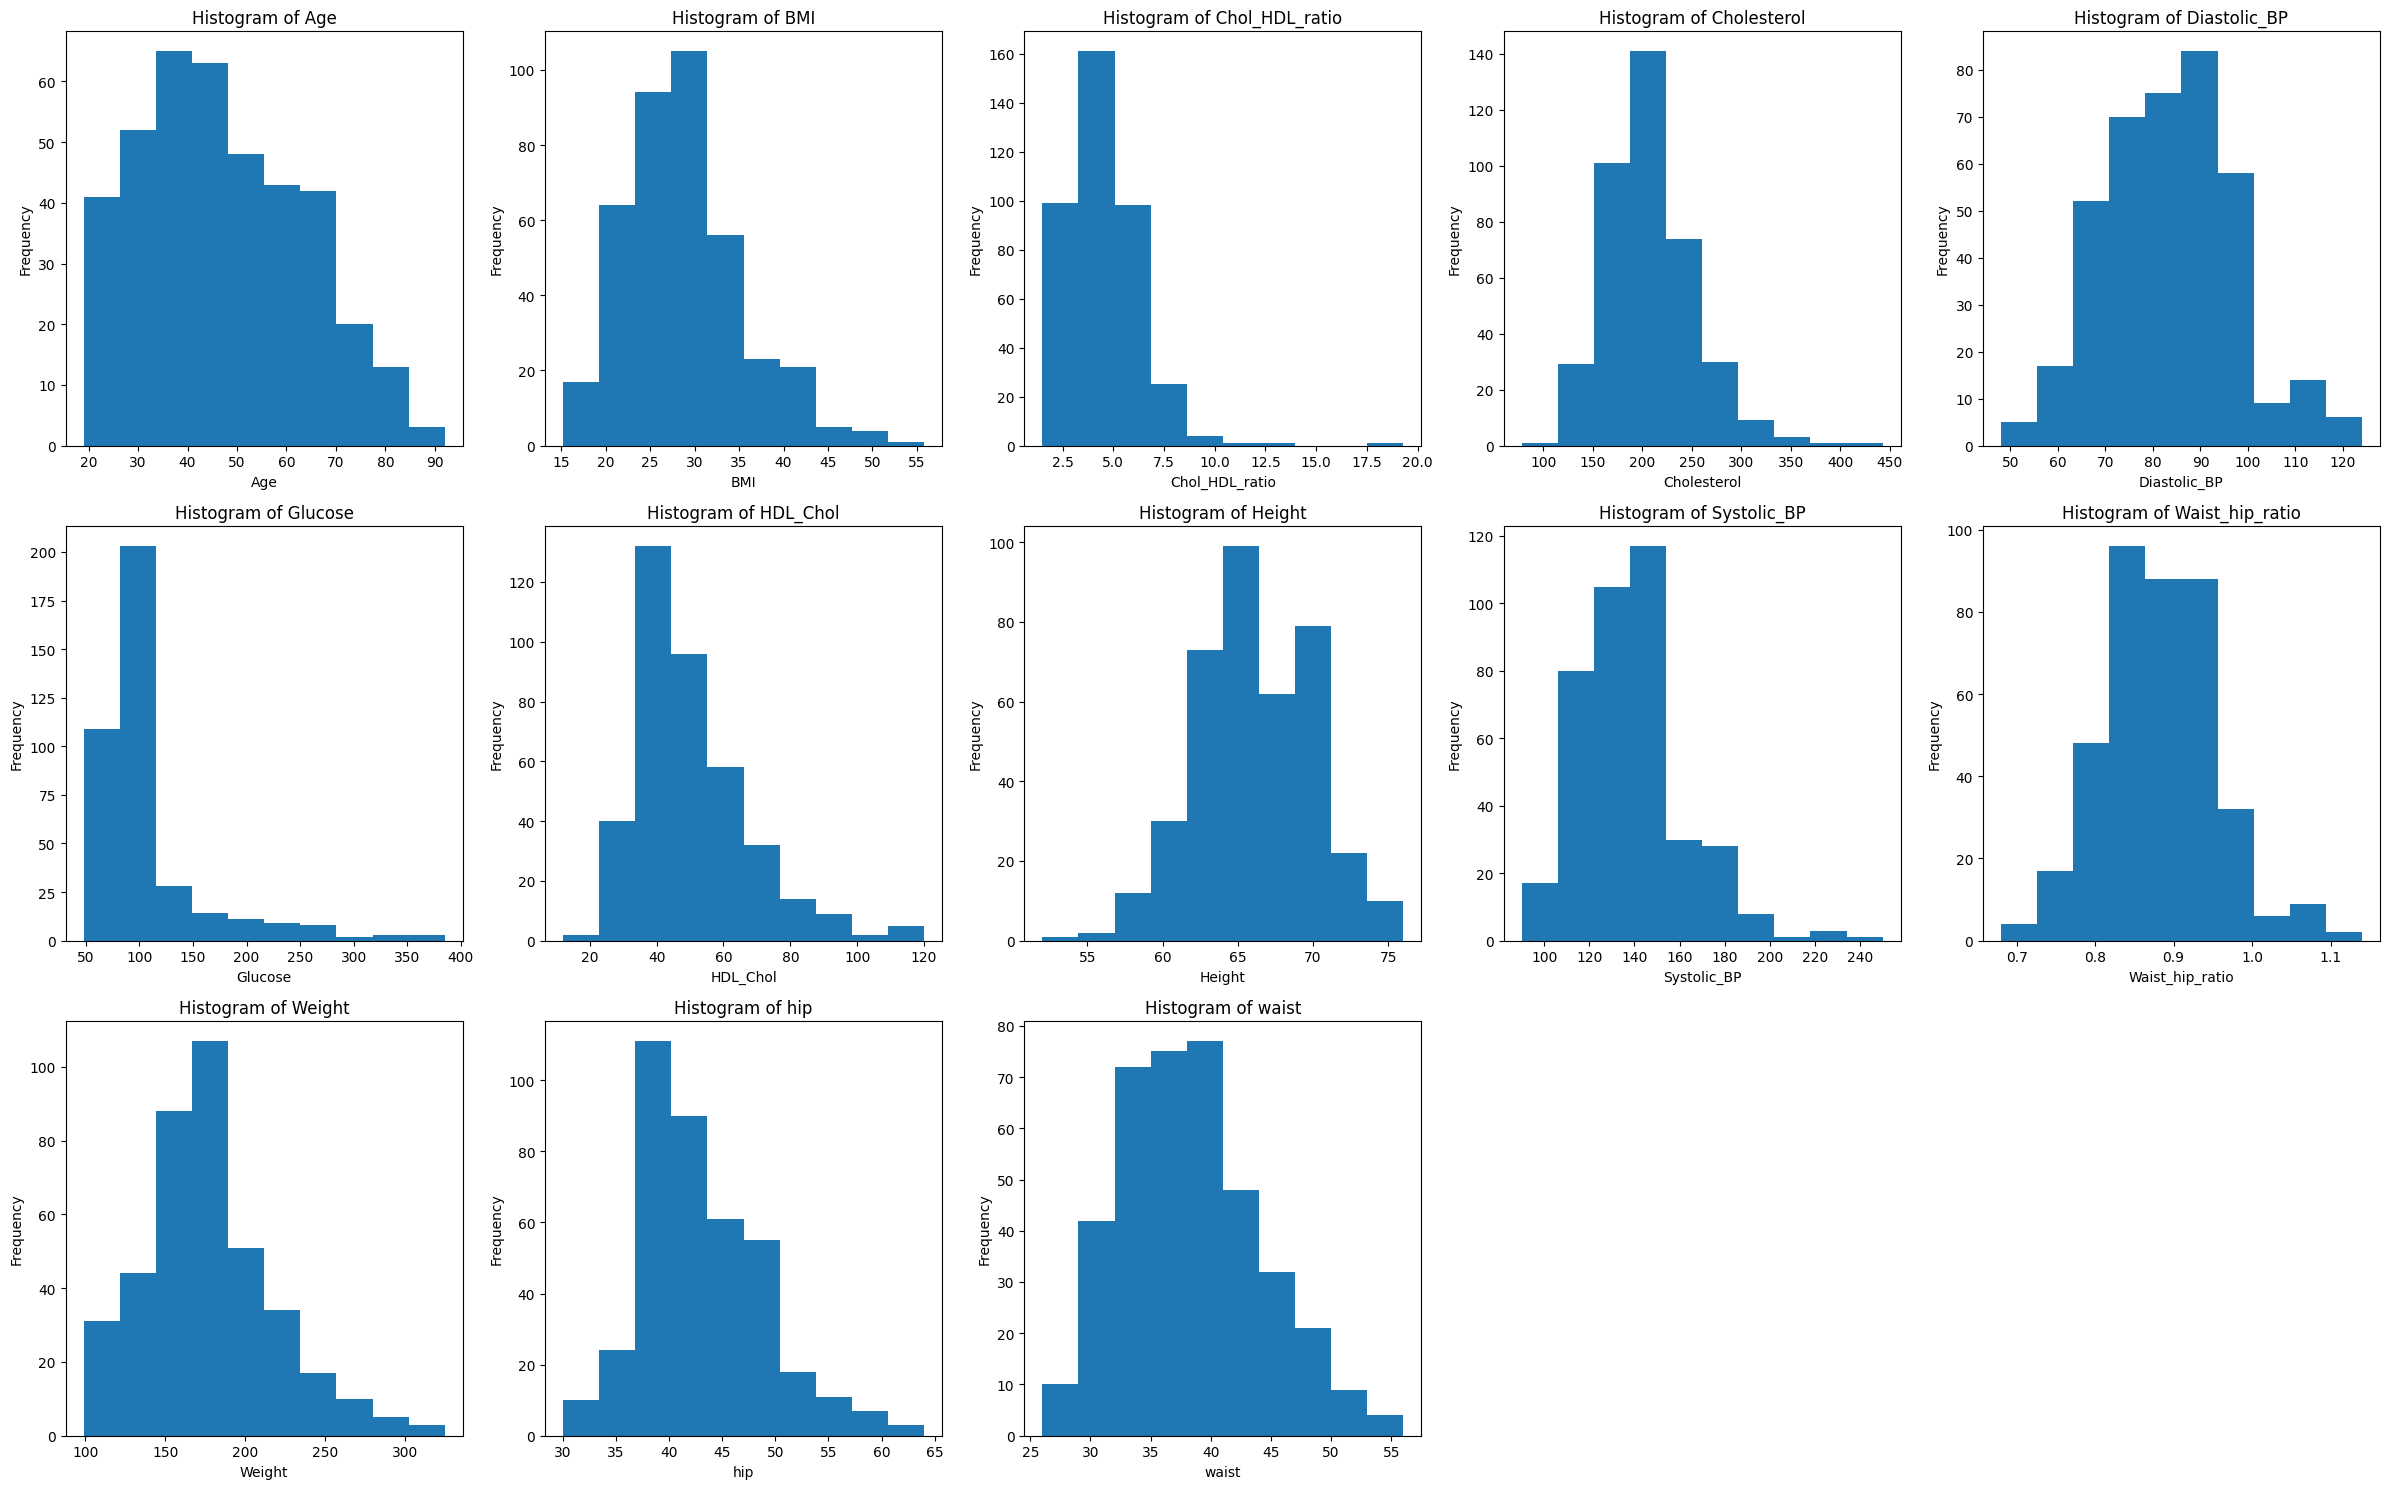

In [7]:
# These commands will make histograms for the numerical variables.
# First we'll save all the column names in a sorted list for later use.
all_columns = sorted([col for col in dm_clean.columns])

# Here we'll save just the category columns, e.g., diabetes and gender, in a sorted list.
cat_columns = sorted([col for col in dm_clean.columns if dm_clean[col].dtype == "object"])

# Lastly, here we'll save the numerical column names, e.g., BMI, SBP, etc.
num_columns = sorted([col for col in dm_clean.columns if dm_clean[col].dtype in ["int64", "float"]])

# Creating a figure object for the histograms with a specified size.
fig = plt.figure(figsize=(24, 15))
i = 0  # Initializing variable

# Looping through each numerical column to create individual histograms.
for column in num_columns:
    sub = fig.add_subplot(3, 5, i + 1)  # Adding a subplot to the figure.
    dm_clean[column].plot(kind='hist', ax=sub)  # Plotting a histogram for the current column.

    sub.set_xlabel(column)  # Setting the x-axis label to the column name.
    sub.set_ylabel("Frequency")  # Setting the y-axis label as "Frequency".
    sub.set_title(f"Histogram of {column}")  # Adding a title for clarity.

    i += 1  # Incrementing the subplot index.

plt.tight_layout()  # Adjust layout to prevent overlapping labels.
plt.show()  # Display the plots.


## Zooming in on Histograms

That was a lot of histograms at once! Let's make an interactive one so we can look at one column at a time and even change the colors. If it doesn't show up the first time, just run the code cell again.

In [8]:
# But wait - you code gurus know there must be a better way to update this for each data element.
# And, isn't this supposed to be interactive? So - The code below creates a dropdown menu for selecting a column.

# To start, let's make a dropdown widget using all the columns, and set the initial drop-down to Age
dd1_all = widgets.Dropdown(
    options=all_columns,  # List of all column names for the dropdown options
    description='Features:',  # Label for the dropdown widget
    value='Age',  # Initial value selected in the dropdown
    disabled=False,  # Dropdown is enabled and interactive
)

# This next little widget lets us modify the colors.
w_colors_1 = widgets.Dropdown(
    options=palettes,  # List of color palettes for the dropdown options
    description='Colors:',  # Label for the dropdown widget
    value=px.colors.qualitative.Pastel1,  # Initial value selected in the dropdown
    disabled=False,  # Dropdown is enabled and interactive
)

# Let's define the histogram function that "draws" our graph and takes column data and the color options as inputs.
def draw_histplot(column, palette):
    # Create a histogram using Plotly Express, with the selected column and color palette
    fig = px.histogram(dm_clean, x=column, width=800, height=400, color_discrete_sequence=palette)
    # Update the layout of the histogram, setting the title and bar gap
    fig.update_layout(bargap=0.1, title_text="Histogram for " + column)
    # Display the histogram
    fig.show()

# Finally, let's display the interactive graph!
# Check out the various distributions by changing the dropdown!
# 'interact' creates an interactive widget that calls 'draw_histplot' whenever a dropdown value changes
interact(draw_histplot, column=dd1_all, palette=w_colors_1);


interactive(children=(Dropdown(description='Features:', options=('Age', 'BMI', 'Chol_HDL_ratio', 'Cholesterol'…

Now you can pick a column from the "Features" dropdown and see its histogram. Try hovering your mouse over the bars to see how many people fall into that range of values!

Comparing Groups with Histograms

What if we want to see how a column's values differ between groups, like people with and without diabetes? We can add another dropdown to split the histogram by category

In [9]:
# First, let's make another dropdown for just the categorical values, i.e., diabetes and gender!
# We can't just use the same one since it would update other cells in this notebook.

# Creating a RadioButtons widget for selecting categorical columns (e.g., Diabetes, Gender).
# Initial value is set to 'Diabetes'.
dd2_categ = widgets.RadioButtons(
    options=cat_columns,  # List of categorical column names for the radio buttons
    description='Groups:',  # Label for the radio buttons widget
    value='Diabetes',  # Initial value selected in the radio buttons
    disabled=False,  # Radio buttons are enabled and interactive
)

# Next, let's add a new dropdown with all the columns.

# Creating a Dropdown widget for selecting any column from 'all_columns'.
# Initial value is set to 'Age'.
dd3_all = widgets.Dropdown(
    options=all_columns,  # List of all column names for the dropdown options
    description='Features:',  # Label for the dropdown widget
    value='Age',  # Initial value selected in the dropdown
    disabled=False,  # Dropdown is enabled and interactive
)

# OK - now we'll add color options again.

# Creating another Dropdown widget for selecting color palettes.
# Initial value is set to 'Pastel1'.
w_colors_2 = widgets.Dropdown(
    options=palettes,  # List of color palettes for the dropdown options
    description='Colors:',  # Label for the dropdown widget
    value=px.colors.qualitative.Pastel1,  # Initial value selected in the dropdown
    disabled=False,  # Dropdown is enabled and interactive
)

# Define the new histogram function.

# Defining the function to draw a stacked histogram.
# This function takes 'hue' (categorical column), 'column' (numerical column), and 'palette' (color palette) as inputs.
def draw_histplot2(hue, column, palette):
    # Create a stacked histogram using Plotly Express, with the selected column and hue, and color palette.
    fig = px.histogram(dm_clean, x=column, color=hue, width=800, height=400, color_discrete_sequence=palette)
    # Update the layout of the histogram, setting the title and bar gap.
    fig.update_layout(bargap=0.1, title_text="Stacked Histogram for " + column + " and Presence of " + hue)
    # Display the histogram.
    fig.show()

# Display the interactive graph!
# 'interact' creates an interactive widget that calls 'draw_histplot2' whenever a dropdown or radio button value changes.
interact(draw_histplot2, hue=dd2_categ, column=dd3_all, palette=w_colors_2);

# Run this cell and compare "Features" for patients with/without diabetes and then again after choosing the Gender option.
# See if the respective height distributions for males and females make sense.
# (Run this cell again if it doesn't initially display a graph below!)

interactive(children=(RadioButtons(description='Groups:', options=('Diabetes', 'Gender'), value='Diabetes'), D…

Now you can choose a feature and a group (Diabetes or Gender) to see how the values are distributed within those groups. Hovering over the bars will show you the counts for each group




# Finding Relationships: Regression Lines   
  
We've seen how individual values are distributed. Now let's see if there are relationships between the numerical values. For example, does blood pressure tend to go up as people get older? We can use a regression line to visualize this. A regression line is a line that tries to show the trend between two sets of numbers.


> **A regression line is designed to predict the "y" value for any "x" input!**

Run the cell below and look at the relationships between features!
Remember "X features" are typically independent, e.g., age, and "Y features" are dependent, i.e., what happens to the output for different inputs.

We'll follow the same approach with a bird's eye view of several regression lines, and then "zoom in" with an interactive "hover" view for variables of interest. This will take a minute to run.

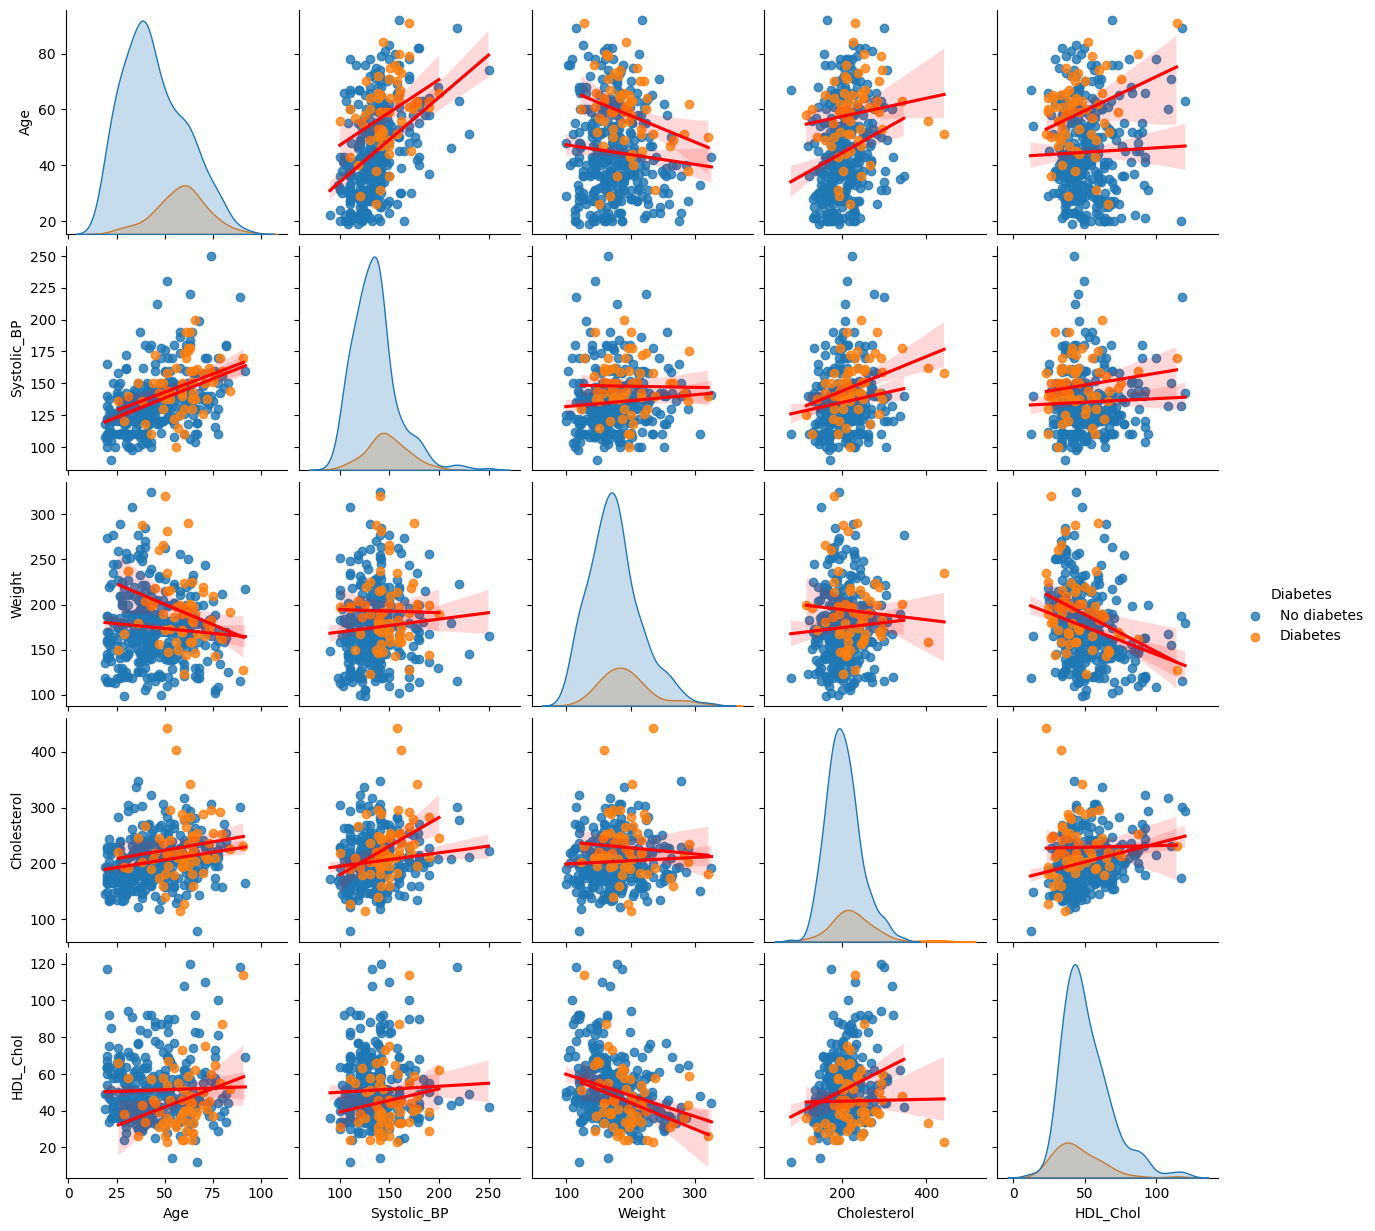

In [10]:
# This single command creates color-coded plots for pairs of variables.

# 'sns.pairplot' creates a grid of plots for each pair of specified variables.
# The data is taken from 'dm_clean' DataFrame and includes the columns 'Age', 'Diabetes', 'Systolic_BP', 'Weight', 'Cholesterol', and 'HDL_Chol'.
# 'kind="reg"' specifies that the type of plot should be a regression plot.
# 'hue="Diabetes"' colors the points based on the 'Diabetes' column, allowing differentiation between patients with and without diabetes.
# 'plot_kws={"line_kws":{"color":"red"}}' specifies additional keyword arguments for the plots, here setting the regression line color to red.

sns.pairplot(dm_clean[['Age', 'Diabetes', 'Systolic_BP', 'Weight', 'Cholesterol', 'HDL_Chol']],
             kind='reg',  # Use regression plots
             hue='Diabetes',  # Color code based on the 'Diabetes' column
             plot_kws={'line_kws':{'color':'red'}});  # Set the regression line color to red


This creates a lot of small plots showing the relationship between pairs of our selected numerical columns. The red line is the regression line. It helps us see if the numbers tend to go up or down together.

Zooming In on Regression Lines (Interactive!)

It's hard to see the details in that grid of plots. Let's make an interactive plot so we can pick two numerical columns and see the regression line clearly, separated by the diabetes group.

In [22]:
# Set a default color palette
default_palette = px.colors.qualitative.Dark24

def draw_regplot(x, y):
    fig = px.scatter(
        dm_clean, x=x, y=y, trendline="ols", width=800, height=400,
        color='Diabetes', color_discrete_sequence=default_palette
    )
    fig.update_layout(title_text=f"Regression plot for {x} impacting {y} with/without Diabetes")
    fig.show()

# Use the dropdowns for x and y only
interact(draw_regplot, x=dd3_x, y=dd4_y);


interactive(children=(Dropdown(description='Independent:', options=('Age', 'BMI', 'Chol_HDL_ratio', 'Cholester…

Hover over a data point and you can see the individual values. Hover over the regression line and you can see the regression equation, the r-squared value, and the predicted y value for that x input.

R-squared is a goodness-of-fit statistic for linear regression. It reveals to what extent variance in the dependent variable is explained by the independent variable and ranges between 0 and 1.

Try these scenarios for our dataset (y = dependent):
- What happens to SBP (y) as patients get older (x)? What is the r-squared?
- What happens to cholesterol (y) as patients get older (x)?    
- What happens to HDL (y) as weight goes up (x)?
- What happens to weight (y) as patients get taller (x)?  
- What happens to glucose (y) as weight increases (x)?

## Box Plots

We saw how regression lines show relationships between numbers. How about comparing numerical values between categories? For example, is blood pressure generally higher for people with diabetes? A box plot is a great way to visualize this. It shows us the spread of data and the middle value (median) for different groups.  

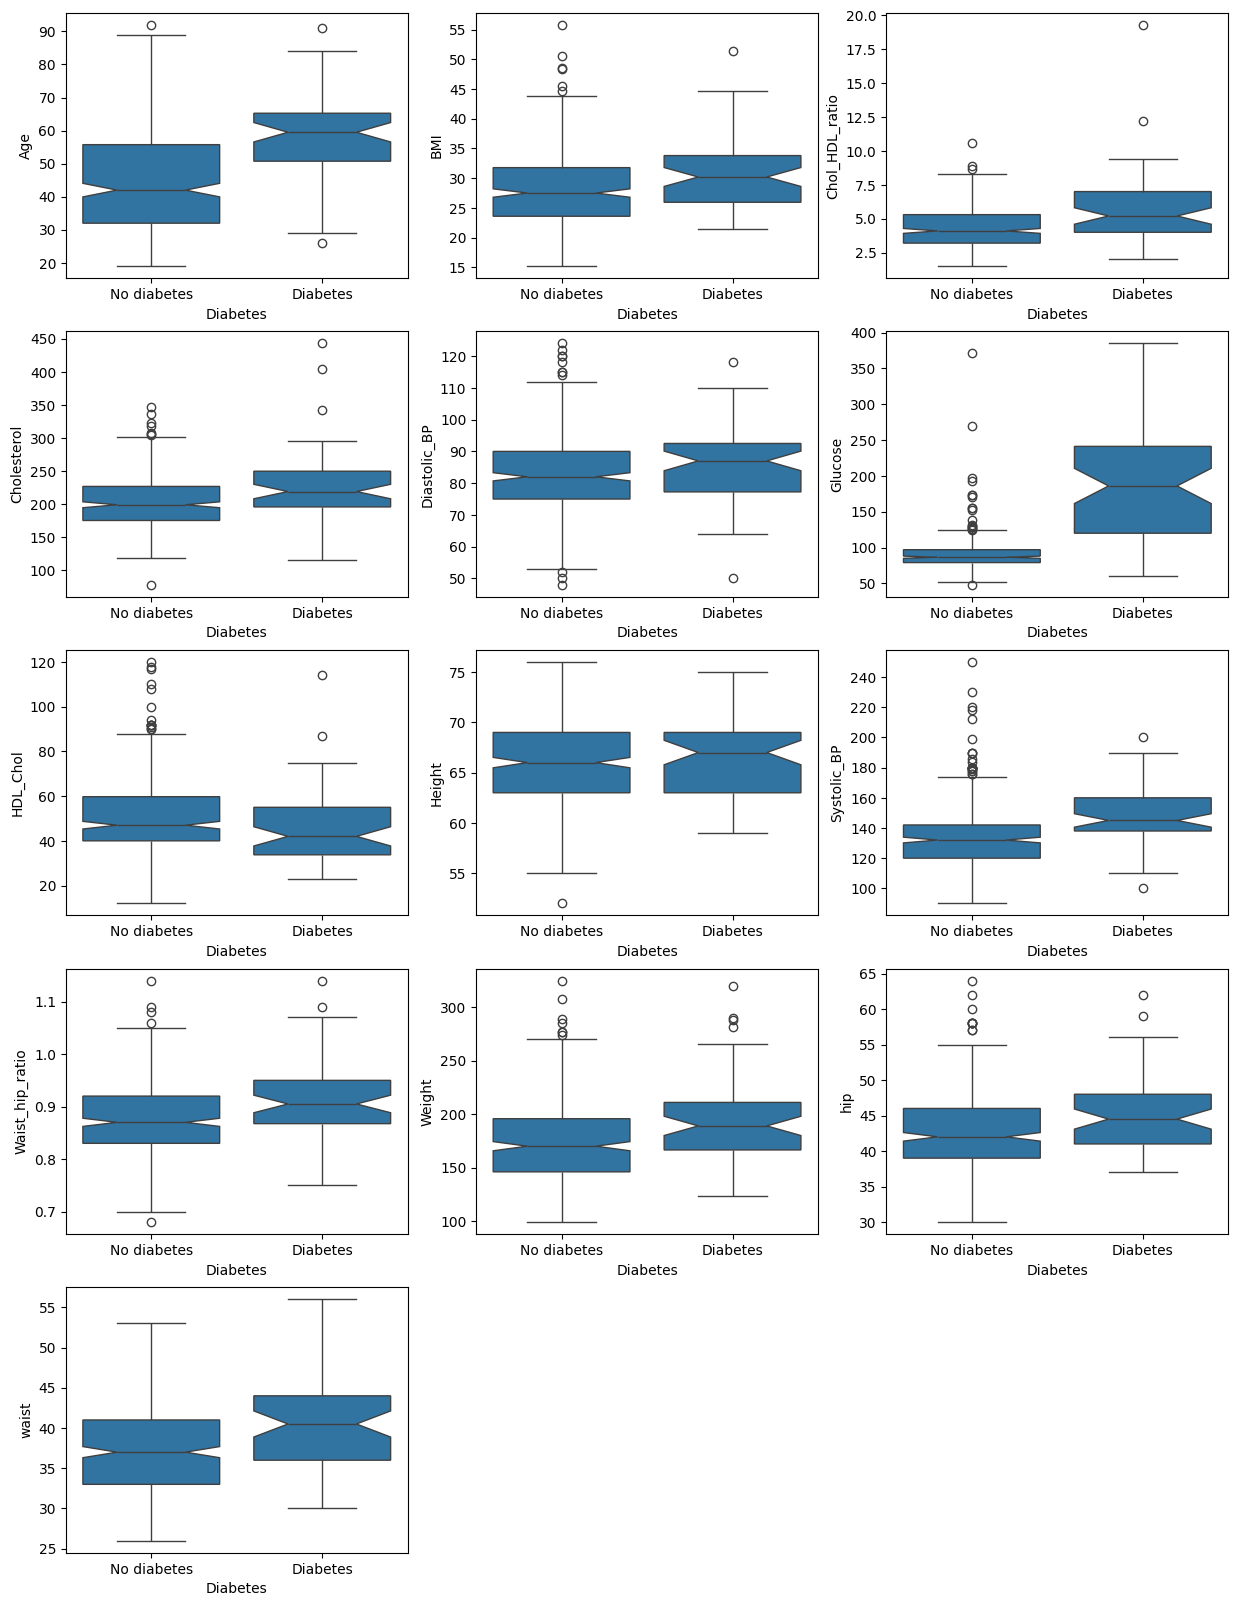

In [12]:
# These commands configure all these box plots used to visualize numerical differences between groups.

# Creating a new figure with specified size for multiple box plots.
fig = plt.figure(figsize=(15, 20))

# Looping through each numerical column to create individual box plots.
for i in range(len(num_columns)):
    column = num_columns[i]
    # Adding a subplot for each box plot.
    sub = fig.add_subplot(5, 3, i + 1)
    # Creating a box plot using Seaborn's boxplot function.
    sns.boxplot(x='Diabetes', y=column, data=dm_clean, notch=True)


This creates a series of box plots, each showing a numerical column compared between the 'Diabetes' and 'No Diabetes' groups.

## Zoomed in Box Plot

Let's make an interactive box plot so we can look at one numerical column at a time and even split it by Gender as well.

In [13]:
# Definiing the box plot!

# Create another dropdown widget for selecting a numerical feature (e.g., glucose) for the box plot.
dd7_num = widgets.Dropdown(
    options=num_columns,  # List of numerical column names for the dropdown options
    description='Feature:',  # Label for the dropdown widget
    value='Glucose',  # Initial value selected in the dropdown
    disabled=False,  # Dropdown is enabled and interactive
)

# This widget will create subgroups of categorical variables for more in-depth analysis.

# Creating RadioButtons widget for selecting a subgrouping categorical variable (e.g., diabetes or gender).
dd22_categ = widgets.RadioButtons(
    options=cat_columns,  # List of categorical column names for the radio button options
    description='Subgroup:',  # Label for the radio button widget
    value='Diabetes',  # Initial value selected in the radio button
    disabled=False,  # Radio button is enabled and interactive
)

# This widget just brings us the fun colors again.

# Creating another Dropdown widget for selecting color palettes.
# Initial value is set to 'Plotly'.
w_colors_4 = widgets.Dropdown(
    options=palettes,  # List of color palettes for the dropdown options
    description='Colors:',  # Label for the dropdown widget
    value=px.colors.qualitative.Plotly,  # Initial value selected in the dropdown
    disabled=False,  # Dropdown is enabled and interactive
)

# Let's define the box plot function

# Defining the function to create a box plot.
# This function takes 'col' (numerical feature), 'categ' (subgrouping categorical variable), and 'palette' (color palette) as inputs.
def show_box(col, categ, palette):
    # Create a box plot using Plotly Express.
    fig = px.box(dm_clean, x=categ, y=col, color="Diabetes", notched=True, width=800, height=500, color_discrete_sequence=palette)
    # Update the layout of the plot, setting the title.
    fig.update_layout(title_text="Box plot for " + categ + " category and values of " + col)
    # Display the plot.
    fig.show()

# Display the interactive graph!

# 'interact' creates an interactive widget that calls 'show_box' whenever a dropdown value changes.
interact(show_box, col=dd7_num, palette=w_colors_4, categ=dd22_categ);


interactive(children=(Dropdown(description='Feature:', index=5, options=('Age', 'BMI', 'Chol_HDL_ratio', 'Chol…

Now you can pick a "Feature" (numerical column) and a "Subgroup" (Diabetes or Gender). The box plot shows you::

* The line in the middle of the box is the median (the middle value).    
* The notch in the side of the box is the 95% confidence interval around the median value. If the notches for the two box plots do not overlap, (with some caveats), the median values appear to be significantly different for each of the groups (as for age, glucose, and SBP above)!
* The whiskers (horizontal lines connected by a vertical line), include the remaining quartiles above and below the box.    
* The scattered dots outside these last horizontal lines of the whiskers are considered outliers since they are very far from the median values. (More than 1.5 X the size of the box away the median value)   

Try changing the subgroup to Gender to see how the numerical features compare between men and women, still separated by diabetes status.

## Violin Plots

Box plots are great, but sometimes we want to see the actual shape of the data's distribution. A violin plot is like a box plot, but it also shows the density of the data at different values. Think of it like a smoothed histogram on its side.



In [14]:
# Create another dropdown widget for selecting a numerical feature (e.g., glucose).
dd8_num = widgets.Dropdown(
    options=num_columns,  # List of numerical column names for the dropdown options
    description='Feature:',  # Label for the dropdown widget
    value='Glucose',  # Initial value selected in the dropdown
    disabled=False,  # Dropdown is enabled and interactive
)

# Create a subgroup dropdown for additional analysis by gender stratification.

# Creating RadioButtons widget for selecting a subgrouping categorical variable (e.g., diabetes or gender).
dd23_categ = widgets.RadioButtons(
    options=cat_columns,  # List of categorical column names for the radio button options
    description='Subgroup:',  # Label for the radio button widget
    value='Diabetes',  # Initial value selected in the radio button
    disabled=False,  # Radio button is enabled and interactive
)

# Create an option to show all the datapoints in the dataset directly on the graph!

# Creating RadioButtons widget for selecting whether to show all data points on the graph.
datapoints = widgets.RadioButtons(
    options=[('yes', 'all'), ('no', False)],  # Options for showing all points or not
    description='Show points:',  # Label for the radio button widget
    value=False,  # Initial value selected in the radio button
    disabled=False,  # Radio button is enabled and interactive
)

# Add back our fun color options!

# Creating another Dropdown widget for selecting color palettes.
# Initial value is set to 'Dark24'.
w_colors_5 = widgets.Dropdown(
    options=palettes,  # List of color palettes for the dropdown options
    description='Colors:',  # Label for the dropdown widget
    value=px.colors.qualitative.Dark24,  # Initial value selected in the dropdown
    disabled=False,  # Dropdown is enabled and interactive
)

# Let's define the violin plot function which takes our columns (features), palette (colors),
# categories (gender/dm), and data points as inputs.

# Defining the function to create a violin plot.
# This function takes 'col' (numerical feature), 'palette' (color palette), 'categ' (subgrouping categorical variable), and 'points' (whether to show all data points) as inputs.
def show_violin(col, palette, categ, points):
    # Create a violin plot using Plotly Express.
    fig = px.violin(dm_clean, x=categ, y=col, color="Diabetes", box=True, points=points, width=800, height=500, color_discrete_sequence=palette)
    # Update the layout of the plot, setting the title.
    fig.update_layout(title_text="Violin Plot for Category of " + categ + " and Values for " + col)
    # Display the plot.
    fig.show()

# Display the interactive graph!

# 'interact' creates an interactive widget that calls 'show_violin' whenever a dropdown value changes.
interact(show_violin, col=dd8_num, palette=w_colors_5, categ=dd23_categ, points=datapoints);

# Run the cell again if it doesn't show up at first!


interactive(children=(Dropdown(description='Feature:', index=5, options=('Age', 'BMI', 'Chol_HDL_ratio', 'Chol…

Violin plots give you a richer view of the data's distribution compared to just a box plot. You can see where the values are most concentrated (the wider parts of the violin).

Quantifying Relationships: Correlation

We've looked at visual relationships with regression lines and box plots. But can we put a number on how strongly two things are related? Yes, with correlation!

To calculate correlation between a number and a category (like Glucose and Diabetes), we first need to turn the category into a number. We'll assign 0 to one category (like 'No Diabetes') and 1 to the other ('Diabetes').

In [15]:



# Identifying binary categorical variables
binary_vars = [col for col in dm_clean.columns if dm_clean[col].nunique() == 2]

# Converting binary categorical variables to numerical (most frequent category should be 0)
for col in binary_vars:
    most_frequent = dm_clean[col].mode()[0]
    dm_clean[col] = dm_clean[col].apply(lambda x: 0 if x == most_frequent else 1)

# Let's copy our column names to another list we can modify
all_columns_update = dm_clean.columns.tolist()


# Now we can enable our widget dropdown names
dd9_all = widgets.Dropdown(options=all_columns_update, description='Correlations:', value='Diabetes', disabled=False)

# Define the correlation function which takes one input and compares it against all the other numerical features available
def show_corr(col):
    corr_df = dm_clean.corr()
    display(corr_df.round(3)[col].sort_values(ascending=False))

# Display the interactive widget
interact(show_corr, col=dd9_all);


interactive(children=(Dropdown(description='Correlations:', index=14, options=('Cholesterol', 'Glucose', 'HDL_…

This code calculates a "correlation coefficient" for each pair of columns.

A positive correlation (close to 1) means the values tend to go up together.
A negative correlation (close to -1) means as one value goes up, the other tends to go down.
A correlation close to zero means there's not much of a linear relationship.
You can pick a column from the "Correlations" dropdown and see how it's related to all the other columns.

Correlation vs. Regression (Quick Review)

Think of it this way:

Regression (the lines we saw earlier) is about predicting one value from another. The slope of the line tells you the direction and strength of the relationship. The r-squared value tells you how well the line fits, from 0 to 1.
Correlation (the numbers we just saw) just tells you the strength and direction of the relationship, from -1 to 1.
Correlation values are the same whether you look at the relationship from A to B or B to A. Regression lines and their r-squared values can be different depending on which variable you're trying to predict.

## Heatmaps

Seeing all those numbers for correlations can be a bit much. A heatmap is a great visual way to see all the correlations at once using colors.

In [16]:
# You may have thought lots of code is needed to create this cool depiction. See here - not so complicated.

# Calculate the correlation matrix for dm_clean dataframe.
corr = dm_clean.corr()

# Use Plotly Express to create a heatmap visualization of the correlation matrix.
fig = px.imshow(corr, color_continuous_scale="Picnic_r")  # Picnic_r is a color scale for the heatmap
fig.update_layout(title_text="Heatmap Showing Correlations between Variables")  # Set the title of the heatmap
fig.show()  # Display the heatmap


This heatmap uses colors to show the strength and direction of correlations between all pairs of our columns. The color bar on the right tells you what the colors mean. Stronger positive correlations are one color, and stronger negative correlations are another. White means a correlation close to zero.

Hover your mouse over the squares in the heatmap to see the exact correlation value. It's easy to spot the strong relationships this way! For example, you'll see bright colors where Glucose and Diabetes intersect, or where Weight and BMI intersect.

That's it for Part 2! You've learned how to explore and visualize your data in many ways. In [Part 3](https://colab.research.google.com/drive/1BGcVeHHYoX6lJmHZl1nZABZlFF2H4QVO?usp=sharing), we'll use this understanding to build a model that can predict whether someone has diabetes!

Please complete this [brief survey](https://forms.office.com/Pages/ResponsePage.aspx?id=YdN2fXeCCEekd2ToNmzRvGXoNK98sEZMuZbd9f2qOxtUQzUzVkZWUFoyWlA0TDkxSFg0VVM3SjNDRC4u) to show you're done!

Thank you!

David Liebovitz, MD
